<a href="https://colab.research.google.com/github/BLURFACEX/BLURFACEX/blob/main/TRAINING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!nvidia-smi

In [ ]:
%cd '/content/drive/My Drive'
!git clone https://github.com/AlexeyAB/darknet
%cd darknet 
!wget http://pjreddie.com/media/files/darknet53.conv.74
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!make


In [ ]:
%cd '/content/drive/My Drive/darknet'

!unzip -uq custom/custom_data.zip -d data

!cp custom/classes.names data
!cp custom/obj.data data
!cp custom/train.txt data
!cp custom/test.txt data 

!cp custom/yolov3_custom_train.cfg cfg
!cp custom/yolov3_custom_test.cfg cfg

In [ ]:
%cd '/content/drive/My Drive/darknet'
!./darknet detector train data/obj.data cfg/yolov3_custom_train.cfg darknet53.conv.74 -dont_show

In [ ]:
%cd '/content/drive/My Drive/darknet'
!./darknet detector train data/obj.data cfg/yolov3_custom_train.cfg backup/yolov3_custom_train_last.weights -dont_show

In [ ]:
%cd '/content/drive/My Drive/darknet'
!./darknet detector test data/obj.data cfg/yolov3_custom_test.cfg backup/yolov3_custom_train_final.weights '/content/drive/MyDrive/darknet/fossil images/images.jpg' -thresh 0.3

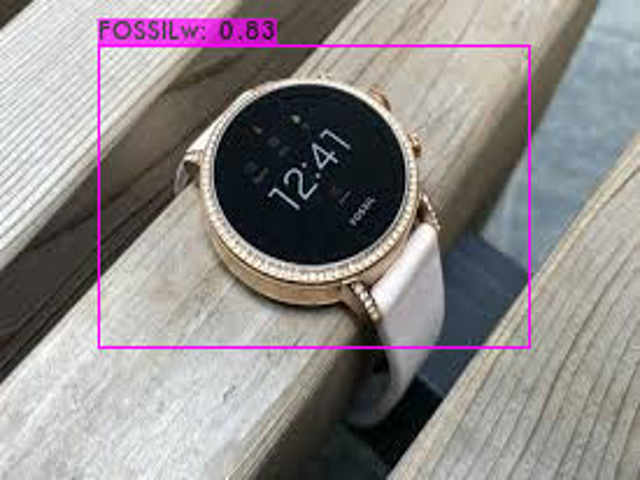

In [28]:
from PIL import Image 
im=Image.open('predictions.jpg')
im.resize((640,480))